# Lecture 3 - Linear Regression, Generalization & Regularization

## Supervised Learning

**Supervised Learning:** Learning a mapping from input data to desired output values given labeled training data.

The typical workflow of a Supervised Learning algorithm is as follows:

**Training Stage**
1. Collect labeled training data - often the most time-consuming and expensive task.
2. Extract features - extract *useful* features from the input (or observational) data such that they have discriminatory information in successfully mapping the desired output. 
3. Select a model - relationship between input data and desired output.
4. Fit the model - change model parameters (*Learning Algorithm*) in order to meet some *Objective Function*.

<div><img src="figures/SupervisedLearning.png", width="800"><!div>

**Testing Stage**
1. Given unlabeled test data
2. Extract (the same) features
3. Run the unabeled data through the trained model

## Linear Regression

**Linear Regression** is a form of *predictive modelling* approach to characterize the relationship between some collection of observational input data and a continuous desired response. 

* A linear regression model is a linear *weighted* combination of input values.

* Regression is a type of **supervised** machine learning problem.

Consider the example below:

* The goal is to *train* a model that takes in the silhouette images with their correspondent labels (age of the person in the silhouette) and learn a linear weighted relationship between images and weight.

<div><img src="figures/silhoutte_regression.png", width="400"><!div>

* After the model is trained, the **goal** is to be able to *predict* the desired output value of any *new* unlabeld test data.

## Polynomial Curve Fitting

<div class="alert alert-info">
    
**Polynomial Regression** is a type of liner regression that uses a special set of *features* - polynomial features.
</div>

<div class="alert alert-success">
    <b>Step 1 - Input Space</b> 

Suppose we are given a training set comprising of $N$ observations of $\mathbf{x}$, $\mathbf{x} = \left[x_1, x_2, \ldots, x_N \right]^T$, and its corresponding desired outputs $\mathbf{t} = \left[t_1, t_2, \ldots, t_N\right]^T$, where sample $x_i$ has the desired label $t_i$.

So, we want to learn the *true* function mapping $f$ such that $\mathbf{t}  = f(\mathbf{x}, \mathbf{w})$, where $\mathbf{w}$ are parameters of the model.
</div>

* We generally organize data into *vectors* and *matrices*. Not only is it a common way to organize the data, but it allows us to easily apply linear algebraic operations during analysis. It also makes it much simpler when it comes to code implementation!
    * In engineering textbooks and for this class, **vectors** are defined as *column vectors*. This is why we write $\mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N\end{array} \right] = \left[x_1, x_2, \ldots, x_N \right]^T$.

* Note that both the training data and desired outputs can be noisy.

### Linear Algebra Review

Let us review some linear algebra: 

* What is a vector?
$$\mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N\end{array} \right]$$

* What is the transpose operation? 
$$\mathbf{x}^T = \left[  x_1,  x_2 , \cdots , x_N \right]$$

* Vectors are often used to represent a data point (as a concatenation of all of the associated features for the data point)

* Given a vector $\mathbf{x} \in \mathbb{R}^N$ and a scalar value $a$, what is $a\mathbf{x}$?  What does this operation do geometrically?

* Given $\mathbf{x} \in \mathbb{R}^N$ and $\mathbf{y} \in \mathbb{R}^N$, what is $\mathbf{x} + \mathbf{y}$?  What is the geometric interpretation? 

* Given $\mathbf{x} \in \mathbb{R}^N$ and $\mathbf{y} \in \mathbb{R}^N$, what is $\mathbf{x} - \mathbf{y}$? What is the geometric interpretation? 

* An important operation is the *inner product*:
$$\mathbf{x}^T\mathbf{y} = \mathbf{y}^T\mathbf{x} = \sum_{i=1}^N x_iy_i$$

* What is the *outer product*? 
$$\mathbf{x}\mathbf{y}^T = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N\end{array} \right] \left[ \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N\end{array} \right]^T = \left[\begin{array}{cccc} x_1y_1 & x_1y_2 & \cdots & x_1y_N \\ x_2y_1 & x_2y_2 & \cdots & x_2y_N \\ \vdots & \vdots & \ddots & \vdots \\ x_Ny_1 & x_Ny_2 & \cdots & x_Ny_N \end{array} \right]$$

* What is the L-p norm of a vector $\mathbf{z} = \left[ z_1,  z_2 , \cdots , z_N \right]^T$?

$$\left\Vert \mathbf{z} \right\Vert_p = \left(z_1^p + z_2^p + \cdots + z_N^p\right)^{\frac{1}{p}}$$

For example, the **squared** L2-norm of a vector $\mathbf{z}$ is $\left\Vert \mathbf{z} \right\Vert_p^2 = \left(\left(z_1^2 + z_2^2 + \cdots + z_N^2\right)^{\frac{1}{2}}\right)^2 = z_1^2 + z_2^2 + \cdots + z_N^2 = \mathbf{z}^T\mathbf{z}$

* Note the notation:  scalar values are unbolded (e.g., $N$, $x$), vectors are lower case and bolded (e.g., $\mathbf{x}$), arrays/matrices are uppercase and bolded (e.g., $A \in \mathbb{R}^{d \times N}$), vectors are generally assumed to be column vectors.

<div class="alert alert-info">

Here is a quick video review of vectors: [Season 1 Episode 1 of 3Blue1Brown Series](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

Here is a quick video review of matrix multiplication: [Season 1 Episode 4 of 3Blue1Brown Series](https://www.youtube.com/watch?v=XkY2DOUCWMU&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4)
</div>

## Polynomial Curve Fitting cont.

<div class="alert alert-success">
    <b>Step 2 - Feature Extraction</b> 

For the polynomial regression problem, let's consider *polynomial features* for each data point $x_i$. Let's say we can find these features using a **basis function**, $\phi(\mathbf{x})$. In the *polynomial regression* example, let's consider $\phi(x_i) = \left[\begin{array}{ccccc} x_{i}^{0} & x_{i}^{1} & x_{i}^{2} & \cdots & x_{i}^{M}\end{array}\right]^T$, where $x_i^M$ is the $M^{th}$-power of $x_i$.
</div>

* Other features can be extracted.

* For all data observations $\{x_i\}_{i=1}^N$ and using the feature space defined as $\phi(x_i) = \left[\begin{array}{ccccc} x_{i}^{0} & x_{i}^{1} & x_{i}^{2} & \cdots & x_{i}^{M}\end{array}\right]^T$, we can write the input data in a *matrix* form as:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right] \in \mathbb{R}^{N\times (M+1)}$$

where each row is a feature representation of a data point $x_i$.

<div class="alert alert-info">
    <b>Feature Space</b> 

The set of features drawn by the transformation 

\begin{align}
\phi: \mathbb{R}^D & \rightarrow \mathbb{R}^M \\
\mathbf{x} & \rightarrow \left[\begin{array}{ccccc} x_{i}^{0} & x_{i}^{1} & x_{i}^{2} & \cdots & x_{i}^{M}\end{array}\right]^T
\end{align}
is often called the **feature space**.
When we write a linear regression with respect to a set of basis functions, the regression model is linear in the *feature space*.

$M$ is dimensionality of the feature space and is often called the *model order*.
</div>

* Now, we want to find the mapping from the feature input data $\mathbf{X}$ to the desired output values $\mathbf{t}$.

Suppose the data actually comes from some **unknown hidden function**, that takes in the data points $\mathbf{x}$ with some parameters $\mathbf{w}$ and produces the desired values $\mathbf{t}$, i.e. $\mathbf{t} = f(\mathbf{x},\mathbf{w})$.
* We do not know anything about the function $f$. If we knew the hidden function, we would not need to learn the *mapping* - we would already know it. However, since we do not know the true underlying function, we need to do our best to estimate from the examples of input-output pairs that we have.

<div class="alert alert-success">
    <b>Step 3 - Model Selection or Mapping</b> 

Let's assume that the desired output values are a *linear combination* of the feature input space, i.e., the **polynomial function**

$$t \sim y(x,\mathbf{w}) = w_0x^0 + w_1x^1 + w_2x^2+\cdots+w_Mx^M = \sum_{j=0}^M w_jx^j$$
</div>

* This means that for every paired training data point $\{x_i, t_i\}_{i=1}^N$, we can model the output value as 

$$t_i \sim y(x_i,\mathbf{w}) = w_0x_i^0 + w_1x_i^1 + w_2x_i^2+\cdots+w_Mx_i^M $$

* Although the polynomial function $y(x,\mathbf{w})$ is a nonlinear function of $x$, it is a linear function of the coefficients $\mathbf{w}$. Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called *linear models*.


The values of the coefficients $\mathbf{w}$ will be determined by *fitting* the polynomial to the training data. 

This can be done by minimizing an **error function** (also defined as **cost function**, **objective function**, or **loss function**) that measures the *misfit* between the function $y(x,\mathbf{w})$, for any given value of $\mathbf{w}$, and the training set data points $\{x_i,t_i\}_{i=1}^N$.

* What is the model's *objective* or goal?

<div><img src="figures/LeastSquares.png", width="300"><!div>

One simple choice for fitting the model is to consider the error function given by the sum of the squares of the errors between the predictions $y(x_i,\mathbf{w})$ for each data point $x_i$ and the corresponding target values $t_i$, so that we minimize

\begin{align*} J(\mathbf{w}) &= \frac{1}{2} \sum_{n=1}^N \left(y(x_n,\mathbf{w}) - t_n\right)^2 \\
&= \frac{1}{2} \sum_{n=1}^N \left(\sum_{j=0}^M w_jx_n^j -t_n \right)^2
\end{align*}

* This error function is minimizing the (Euclidean) *distance* of every point to the curve.

* **What other/s objective function can we use?**

* We can write the error function compactly in matrix/vector form:
\begin{align*}
J(\mathbf{w}) &= \frac{1}{2}\left\Vert y(\mathbf{x},\mathbf{w}) - \mathbf{t} \right\Vert^2_2 \\
&= \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t}\right\Vert^2_2\\
&= \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)\\
\text{where: } & \mathbf{X} = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right], \mathbf{w} =  \left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{M}
\end{array}\right], \text{and }  \mathbf{t} = \left[\begin{array}{c}
t_{1}\\
t_{2}\\
\vdots\\
t_{N}
\end{array}\right]
\end{align*}

<div class="alert alert-success">
    <b>Step 4 - Model Fitting</b> 

Also referred as training the model.

We *fit* the polynomial function model such that the *objective function* $J(\mathbf{w})$ is minimized, i.e. we *optimize* the following error function

\begin{align}
J(\mathbf{w}) &= \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right) \\
&= \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert_2^2
\end{align}

* This function is called the **least squares error** objective function.

The optimization function is then:
$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$ 
</div>

* So, we want $J(\mathbf{w})$ to be small. What is the set of parameters $\mathbf{w}$ that minimize the objective function $J(\mathbf{w})$?

* What do you mean by **optimize** $J(\mathbf{w})$? **How do you find $\mathbf{w}$?**

<!-- * To do that, we **take the derivative of $J(\mathbf{w})$ with respect to the parameters $\mathbf{w}$**.

* How do you take the derivative of a *scalar*, such as $J(\mathbf{w})$, with respect to a vector, such as $\mathbf{w}$?

    * What is the derivative of a scalar with respect to a vector? www.wooclap.com/RBLGOK --> 

* The derivative of the scalar $J(\mathbf{w})$ with respect to the vector $\mathbf{w}=[w_0,w_1,\dots,w_M]^T$ is a **vector**, and it corresponds to take the derivative of $E(\mathbf{w})$ with respect to every element in $\mathbf{w}$:

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \left[ \frac{\partial J(\mathbf{w})}{\partial w_0},  \frac{\partial J(\mathbf{w})}{\partial w_1}, \ldots,  \frac{\partial J(\mathbf{w})}{\partial w_M} \right]^T$$

* If we rewrite the objective function as:
\begin{align}
J(\mathbf{w}) &= \frac{1}{2} \left( \mathbf{X}\mathbf{w} - \mathbf{t}\right)^T\left( \mathbf{X}\mathbf{w} - \mathbf{t}\right) \\
& = \frac{1}{2} \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\left( \mathbf{X}\mathbf{w} - \mathbf{t}\right) \\
& = \frac{1}{2} \left(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} + \mathbf{t}^T\mathbf{t}\right)
\end{align}


* Solving for $\mathbf{w}$, we find:

\begin{align}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[\frac{1}{2} \left(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} + \mathbf{t}^T\mathbf{t}\right) \right] &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[ \left(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} + \mathbf{t}^T\mathbf{t}\right) \right] &= 0\text{, apply product rule} \\
(\mathbf{X}^T\mathbf{X}\mathbf{w})^T + \mathbf{w}^T\mathbf{X}^T\mathbf{X} - (\mathbf{X}^T \mathbf{t})^T - \mathbf{t}^T\mathbf{X} &=0 \\
\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \mathbf{w}^T\mathbf{X}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} &= 0\\
2 \mathbf{w}^T\mathbf{X}^T\mathbf{X} &= 2 \mathbf{t}^T\mathbf{X} \\
(\mathbf{w}^T\mathbf{X}^T\mathbf{X})^T &= (\mathbf{t}^T\mathbf{X})^T\text{, apply transpose on both sides} \\
\mathbf{X}^T\mathbf{X}\mathbf{w} &= \mathbf{X}^T\mathbf{t} \\
\mathbf{w} &= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
\end{align}

* This gives us the **optimal set of parameters** $\mathbf{w}^*$ that minimize the objective function $J(\mathbf{w})$ for the training data $\{X,\mathbf{t}\}_{i=1}^N$, and so,

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$

* So, for all pair of input data points $(x_i,t_i)$, we can write the estimated value of $t_i$ as:

$$\hat{t}_i = y_i = \phi(x_i)\mathbf{w}^*$$

For all data points in matrix form $\mathbf{X}$, we can write:

$$\hat{\mathbf{t}} = \mathbf{y} = X\mathbf{w}$$

<div class="alert alert-info">

Here is a quick video review of inverse matrices: [Season 1 Episode 7 of 3Blue1Brown Series](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=8&t=33s)
</div>

**Test Data**

After the model is trained (i.e. complete optimization of error function using the training labeled data), the **goal** is to *predict* the output values to *new*, unseen and unlabeled test data.

The steps in the test data are:
* Step 1: Extract (the same) features
* Step 2: Run through the trained model using the optimal set of parameters $\mathbf{w}^*$ to find the output value

## Code Implementation

**What can you control?** 

<!-- * Model order -->
<!-- * Feature vectors or *basis functions* -->

How would you implement linear regression using polynomial features?
 * Let's see with an example.

### Example: Suppose Input Data is sampled from a (noisy) sine curve 

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The univariate Gaussian Distribution is defined as:
	\begin{eqnarray}
		\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right\}
	\end{eqnarray}

    where $\mu$ is the mean and $\sigma^2$ is the variance. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

\begin{eqnarray}
		 t = y + \epsilon\\
		 \epsilon = t - y
	 \end{eqnarray}
	 where
	 \begin{eqnarray}
	 	\epsilon \sim \mathcal{N}(0, \sigma^2)
 	 \end{eqnarray}
 	 thus
 	 \begin{eqnarray}
 	 	\mathcal{N}(t-y|0,1) &\propto& \exp\left\{ -\frac{1}{2} \frac{(t-y-0)^2}{1^2} \right\}\\
 	 	&=& \exp\left\{ -\frac{1}{2} (t-y)^2 \right\}\\
 	 	&=&  \exp\left\{ -J(\mathbf{w}) \right\}
 	\end{eqnarray}

* The **least squares** objective function, $J(\mathbf{w})$, assumes Gaussian noise. 

    * Another way to look at it: the desired values, $t$, are distributed according to a Gaussian distribution with mean $y$!

Let's generate data from the *true* underlying function (which, in practice, we would not know).

In [2]:
def NoisySinusoidalData(N, a, b, gVar):
    '''NoisySinusoidalData(N, a, b, gVar): Generates N data points in the range [a,b] 
    sampled from a sin(2*pi*x) with additive zero-mean Gaussian random noise with standard deviation gVar'''
    x = np.linspace(a,b,N) # N input samples, evenly spaced numbers between [a,b]
    noise = np.random.normal(0,gVar,N) # draw N sampled from a univariate Gaussian distribution with mean 0, gVar standard deviation and N data points
    t = np.sin(2*np.pi*x) + noise # desired values, noisy sinusoidal 
    return x, t

In [3]:
# Generate input samples and desired values

N = 40 # number of training data samples
Ntest = 10 # number test data samples
a, b = [0,1] # data samples interval
gVar_train = 0.5 # standard deviation of the zero-mean Gaussian noise observed in the training samples
gVar_test = 1 # standard deviation of the zero-mean Gaussian noise observed in the testing samples
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train) # Training Data - Noisy sinusoidal
x2, t2 = NoisySinusoidalData(N, a, b, 0) # True Sinusoidal - in practice, we don't the true function
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test) # Test Data - Noisy sinusoidal

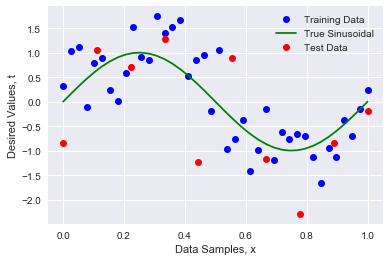

In [4]:
plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x3, t3, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

Now let's fit the data using the *polynomial regression* model:

In [ ]:
def PolynomialRegression(x,t,M):
    '''PolynomialRegression(x,t,M): Fit a polynomial of order M to the data input data x and desire values t'''	
    # To be completed in class
    return 

In [ ]:
# Model Order
M = 13

# Find the parameters that fit the noisy sinusoidal
w, y, error = PolynomialRegression(x1,t1,M) 

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

* How do the weights look like? - Regularization

Let's see how well does this trained model **generalizes** to the **test data**, to which we do **not** have labels.

In [ ]:
# To be completed in class

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x3,y_test,'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

* What happens when the test points fall outside the range of what the model has *learned*?

In [ ]:
x4, t4 = NoisySinusoidalData(10, 0.5, 1.5, 0.1)
x2, t2 = NoisySinusoidalData(N, 0, 1.5, 0)

plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x4, t4, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
# To be completed in class

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x4,y_test,'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t")
plt.show();

* How do we select the *best* model order? - Cross-validation

In [ ]:
# Partition the training into training and validation

from random import sample

#Shuffle the data
temp = sample(range(N), N)

#Define where to split the data
cutPoint = round(0.8 * N) 

#Split the data into training and validation splits
x_train = x1[:cutPoint]
t_train = t1[:cutPoint]
x_val = x1[cutPoint:]
t_val = t1[cutPoint:]

In [ ]:
# Find the Least Squares error for different model orders M

J_train = []
J_val = []
J_test = []
for M in range(5):
    w, y, error_train = PolynomialRegression(x_train,t_train,M)
    
    # Validation
    X_val = np.array([x_val**m for m in range(M+1)]).T
    y_val = X_val@w  
    error_val = y_val - t_val
    
    # Test
    X_test = np.array([x3**m for m in range(M+1)]).T
    y_test = X_test@w  
    error_test = y_test - t3
    
    # Cost function
    J_train+=[np.sum(error_train**2)/2]
    J_val+= [np.sum(error_val**2)/2]
    J_test+=[np.sum(error_test**2)/2]

plt.plot(J_train,'bo-', label = 'Training')
plt.plot(J_val,'ro-', label = 'Validation')
plt.plot(J_test,'go-', label = 'Test')
plt.title('Objective Function')
plt.legend()
plt.xlabel('Model order, M')
plt.ylabel('J(w)');

## Using libraries

We can also implement linear regression using the function ```LinearRegression``` from the module ```linear_model``` within the library ```sklearn```.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(x1[:,np.newaxis], t1)

print(model.score(x1[:,np.newaxis], t1[:,np.newaxis]))
print('The equation of the line is: y = ' + str(model.coef_[0]) + '*x + ' + str(model.intercept_))

In [ ]:
yfit = model.predict(x1[:, np.newaxis])
# yfit3 = model.predict(x3[:,np.newaxis])

plt.plot(x1,t1, 'bo', label = 'Training Data')
plt.plot(x1, yfit, 'r', label = 'Best-fit Line')
# plt.plot(x3,t3, 'ro', label = 'Test Data')
# plt.plot(x3, yfit3, 'k', label = 'Best-fit Line Test')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

M = 3
poly = PolynomialFeatures(M, include_bias=True)
poly.fit_transform(x1[:,np.newaxis]);

In [ ]:
from sklearn.pipeline import make_pipeline

M = 5
poly_model = make_pipeline(PolynomialFeatures(M),LinearRegression())

In [ ]:
poly_model.fit(x1[:, np.newaxis], t1)
yfit = poly_model.predict(x1[:, np.newaxis])
# yfit3 = poly_model.predict(x3[:,np.newaxis])

plt.plot(x1,t1, 'bo', label = 'Training Data')
plt.plot(x1, yfit, 'r', label = 'Estimated Polynomial')
# plt.plot(x3,t3, 'ro', label = 'Test Data')
# plt.plot(x3, yfit3, 'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");